In [1]:
%run ../src/create_data.py

In [2]:
train_samples, train_labels = data()

In [40]:
## displaying only first 10 values from both the list
train_samples[:10], train_labels[:10]

([63, 75, 59, 70, 64, 88, 63, 75, 24, 94], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [3]:
%run ../src/processing.py

In [4]:
scaled_train_samples, train_labels = process(train_samples, train_labels)

In [7]:
type(scaled_train_samples), type(train_labels)

(numpy.ndarray, numpy.ndarray)

In [8]:
scaled_train_samples

array([[0.13793103],
       [0.72413793],
       [0.93103448],
       ...,
       [0.86206897],
       [0.83908046],
       [0.24137931]])

In [9]:
train_labels

array([0, 1, 1, ..., 1, 1, 0])

In [5]:
%run ../src/train.py

In [11]:
test_gpu()

Number of GPU availabe: 1


In [12]:
model = create_model()

In [13]:
model

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [15]:
model = train_model(model, x_train=scaled_train_samples, y_train=train_labels)

Epoch 1/30
210/210 - 1s - loss: 0.7017 - accuracy: 0.4305
Epoch 2/30
210/210 - 1s - loss: 0.6818 - accuracy: 0.6538
Epoch 3/30
210/210 - 1s - loss: 0.6654 - accuracy: 0.6962
Epoch 4/30
210/210 - 1s - loss: 0.6458 - accuracy: 0.7319
Epoch 5/30
210/210 - 1s - loss: 0.6265 - accuracy: 0.7529
Epoch 6/30
210/210 - 1s - loss: 0.6055 - accuracy: 0.7781
Epoch 7/30
210/210 - 1s - loss: 0.5853 - accuracy: 0.8029
Epoch 8/30
210/210 - 1s - loss: 0.5651 - accuracy: 0.8214
Epoch 9/30
210/210 - 1s - loss: 0.5431 - accuracy: 0.8310
Epoch 10/30
210/210 - 1s - loss: 0.5205 - accuracy: 0.8424
Epoch 11/30
210/210 - 1s - loss: 0.4980 - accuracy: 0.8576
Epoch 12/30
210/210 - 1s - loss: 0.4759 - accuracy: 0.8700
Epoch 13/30
210/210 - 1s - loss: 0.4546 - accuracy: 0.8819
Epoch 14/30
210/210 - 1s - loss: 0.4345 - accuracy: 0.8843
Epoch 15/30
210/210 - 1s - loss: 0.4158 - accuracy: 0.8962
Epoch 16/30
210/210 - 1s - loss: 0.3988 - accuracy: 0.8986
Epoch 17/30
210/210 - 1s - loss: 0.3831 - accuracy: 0.9000
Epoch 

In [41]:
scaled_train_samples, train_labels, scaled_valid_samples, valid_labels = train_valid_split(x=train_samples, y=train_labels, per=0.1)

In [42]:
scaled_train_samples.shape, scaled_valid_samples.shape

((1890, 1), (210, 1))

In [46]:
model = create_model()
model = train_valid_model(
    model=model, 
    x_train=scaled_train_samples, 
    y_train=train_labels,
    valid_set=(scaled_valid_samples, valid_labels))

Epoch 1/30
189/189 - 1s - loss: 0.6686 - accuracy: 0.5265 - val_loss: 0.6638 - val_accuracy: 0.5095
Epoch 2/30
189/189 - 0s - loss: 0.6505 - accuracy: 0.5804 - val_loss: 0.6464 - val_accuracy: 0.5905
Epoch 3/30
189/189 - 0s - loss: 0.6303 - accuracy: 0.6339 - val_loss: 0.6259 - val_accuracy: 0.6524
Epoch 4/30
189/189 - 0s - loss: 0.6075 - accuracy: 0.6810 - val_loss: 0.5996 - val_accuracy: 0.6952
Epoch 5/30
189/189 - 0s - loss: 0.5778 - accuracy: 0.7392 - val_loss: 0.5654 - val_accuracy: 0.7667
Epoch 6/30
189/189 - 0s - loss: 0.5491 - accuracy: 0.7831 - val_loss: 0.5391 - val_accuracy: 0.7810
Epoch 7/30
189/189 - 0s - loss: 0.5242 - accuracy: 0.7984 - val_loss: 0.5133 - val_accuracy: 0.8238
Epoch 8/30
189/189 - 0s - loss: 0.5002 - accuracy: 0.8206 - val_loss: 0.4881 - val_accuracy: 0.8333
Epoch 9/30
189/189 - 0s - loss: 0.4771 - accuracy: 0.8450 - val_loss: 0.4642 - val_accuracy: 0.8476
Epoch 10/30
189/189 - 0s - loss: 0.4552 - accuracy: 0.8545 - val_loss: 0.4411 - val_accuracy: 0.8667

In [24]:
%run ../src/test.py

In [7]:
scaled_train_samples, train_labels = process(train_samples, train_labels)            

## test-data
test_samples, test_labels = test_data()
scaled_test_samples, test_labels = process(test_samples, test_labels)

model = create_model()
model = train_model(model, x_train=scaled_train_samples, y_train=train_labels)

predictions = predict(model, scaled_test_samples, test_labels)

Epoch 1/30
210/210 - 0s - loss: 0.7273 - accuracy: 0.4990
Epoch 2/30
210/210 - 0s - loss: 0.7040 - accuracy: 0.5000
Epoch 3/30
210/210 - 0s - loss: 0.6804 - accuracy: 0.7081
Epoch 4/30
210/210 - 0s - loss: 0.6572 - accuracy: 0.8862
Epoch 5/30
210/210 - 0s - loss: 0.6367 - accuracy: 0.8619
Epoch 6/30
210/210 - 0s - loss: 0.6163 - accuracy: 0.8462
Epoch 7/30
210/210 - 0s - loss: 0.5952 - accuracy: 0.8648
Epoch 8/30
210/210 - 0s - loss: 0.5747 - accuracy: 0.8610
Epoch 9/30
210/210 - 0s - loss: 0.5535 - accuracy: 0.8681
Epoch 10/30
210/210 - 0s - loss: 0.5320 - accuracy: 0.8733
Epoch 11/30
210/210 - 0s - loss: 0.5106 - accuracy: 0.8752
Epoch 12/30
210/210 - 0s - loss: 0.4894 - accuracy: 0.8843
Epoch 13/30
210/210 - 0s - loss: 0.4691 - accuracy: 0.8857
Epoch 14/30
210/210 - 0s - loss: 0.4494 - accuracy: 0.8895
Epoch 15/30
210/210 - 0s - loss: 0.4307 - accuracy: 0.8967
Epoch 16/30
210/210 - 0s - loss: 0.4135 - accuracy: 0.8971
Epoch 17/30
210/210 - 0s - loss: 0.3976 - accuracy: 0.9024
Epoch 

In [8]:
predictions.shape

(420, 1)

In [9]:
predictions[:5]

array([[0.9441394 ],
       [0.06245574],
       [0.43226835],
       [0.06090756],
       [0.06378814]], dtype=float32)

In [20]:
predictions[predictions >= 0.5] = 1
predictions[predictions < 0.5] = 0

In [30]:
predictions[:5]

array([1., 0., 0., 0., 0.], dtype=float32)

In [38]:
classes = ['no-side-effects', 'had-side-effects']
plot_confusion_matrix(classes, test_labels, predictions, acc=True, savefig='confusion_matrix')

Acuuracy Score: 0.9238095238095239


Acuuracy Score: 0.9238095238095239


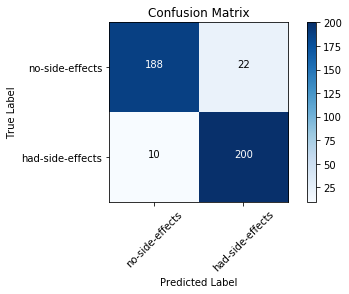

In [39]:
plot_confusion_matrix(classes, test_labels, predictions, acc=True)

In [8]:
model = create_model()
model = train_model(model, x_train=scaled_train_samples, y_train=train_labels)

Epoch 1/30
210/210 - 1s - loss: 0.6902 - accuracy: 0.6081
Epoch 2/30
210/210 - 0s - loss: 0.6711 - accuracy: 0.7748
Epoch 3/30
210/210 - 0s - loss: 0.6523 - accuracy: 0.8000
Epoch 4/30
210/210 - 0s - loss: 0.6318 - accuracy: 0.8281
Epoch 5/30
210/210 - 0s - loss: 0.6102 - accuracy: 0.8471
Epoch 6/30
210/210 - 0s - loss: 0.5881 - accuracy: 0.8581
Epoch 7/30
210/210 - 0s - loss: 0.5654 - accuracy: 0.8690
Epoch 8/30
210/210 - 0s - loss: 0.5417 - accuracy: 0.8814
Epoch 9/30
210/210 - 0s - loss: 0.5176 - accuracy: 0.8786
Epoch 10/30
210/210 - 0s - loss: 0.4935 - accuracy: 0.8924
Epoch 11/30
210/210 - 0s - loss: 0.4701 - accuracy: 0.9024
Epoch 12/30
210/210 - 0s - loss: 0.4476 - accuracy: 0.9067
Epoch 13/30
210/210 - 0s - loss: 0.4267 - accuracy: 0.9038
Epoch 14/30
210/210 - 0s - loss: 0.4077 - accuracy: 0.9076
Epoch 15/30
210/210 - 0s - loss: 0.3904 - accuracy: 0.9148
Epoch 16/30
210/210 - 0s - loss: 0.3751 - accuracy: 0.9090
Epoch 17/30
210/210 - 0s - loss: 0.3618 - accuracy: 0.9152
Epoch 

In [20]:
## saving the entire model
save_model(model=model, model_name='model_0.h5', value=0)

In [21]:
## loading the entire model
model = load_models(model_name='model_0.h5', value=0)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [29]:
## saving only the architecture of the model
save_model(model=model, model_name='model_1.json', value=1)

In [33]:
## loading the architecture of the model
model = load_models(model_name='model_1.json', value=1)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [37]:
## saving the weights
save_model(model=model, model_name='model_2.h5', value=2)

In [40]:
## loading weights
model_2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model_2 = load_models(model_name='model_2.h5', value=2, model=model_2)

In [41]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________
